## <center>Consumer Electronics Sales Customer-intent-Prediction</center>

### Data info

#### Description:

This dataset provides insights into consumer electronics sales, featuring product categories, brands, prices, customer demographics, purchase behavior, and satisfaction metrics. It aims to analyze factors influencing purchase intent and customer satisfaction in the consumer electronics market.

#### Features:
* ProductID: Unique identifier for each product.
* ProductCategory: Category of the consumer electronics product (e.g., - Smartphones, Laptops).
* ProductBrand: Brand of the product (e.g., Apple, Samsung).
* ProductPrice: Price of the product ($).
* CustomerAge: Age of the customer.
* CustomerGender: Gender of the customer (0 - Male, 1 - Female).
* PurchaseFrequency: Average number of purchases per year.
* CustomerSatisfaction: Customer satisfaction rating (1 - 5).
* PurchaseIntent (Target Variable): Intent to purchase.

#### Conclusion:
This dataset facilitates analysis on consumer behavior and purchase patterns in the consumer electronics sector, aiding insights into market dynamics and customer preferences.

#### import needful libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Data Loading And Exploration

In [2]:
df = pd.read_csv('consumer_electronics_sales_data.csv')

In [3]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [4]:
# looking at the shape
df.shape

(9000, 9)

In [5]:
# number of unque variable
df.nunique()

ProductID               9000
ProductCategory            5
ProductBrand               5
ProductPrice            9000
CustomerAge               52
CustomerGender             2
PurchaseFrequency         19
CustomerSatisfaction       5
PurchaseIntent             2
dtype: int64

In [6]:
# checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [7]:
#dropping the product id  collumn
df_1 = df.drop('ProductID', axis=1)

In [8]:
df_1.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0


In [9]:
# checking for missing values
df_1.isna().sum()

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [10]:
# checking for duplicates
df_1.duplicated().sum()

0

#### Preprocessiong

In [11]:
# checking the unique values of the categorical values
print(df_1['ProductCategory'].unique())
print(df_1['ProductBrand'].unique())

['Smartphones' 'Smart Watches' 'Tablets' 'Laptops' 'Headphones']
['Other Brands' 'Samsung' 'Sony' 'HP' 'Apple']


In [12]:
# extracting categorical columns which are of object datatype from the dataset
ca_col = [col for col in df_1.columns if df_1[col].dtype == 'object']
ca_col

['ProductCategory', 'ProductBrand']

In [13]:
# importing the encoder lib
from sklearn.preprocessing import LabelEncoder

In [14]:
#initializing encoder
encoder = LabelEncoder()

#product cat
product_cat_en = encoder.fit_transform(df_1['ProductCategory'])
#brand cat
brand_cat_en = encoder.fit_transform(df_1['ProductBrand'])


In [15]:
product_cat_en[:10]

array([3, 2, 4, 3, 4, 3, 3, 3, 1, 1])

In [16]:
df_1['ProductCategory'][:10]

0      Smartphones
1    Smart Watches
2          Tablets
3      Smartphones
4          Tablets
5      Smartphones
6      Smartphones
7      Smartphones
8          Laptops
9          Laptops
Name: ProductCategory, dtype: object

In [17]:
brand_cat_en[:10]

array([2, 3, 3, 3, 4, 3, 3, 1, 2, 1])

In [18]:
df_1['Product_cat_en'] = product_cat_en
df_1['Brand_cat_end'] = brand_cat_en

In [19]:
df_1.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,Product_cat_en,Brand_cat_end
0,Smartphones,Other Brands,312.949668,18,0,2,1,0,3,2
1,Smart Watches,Samsung,980.389404,35,1,7,2,1,2,3
2,Tablets,Samsung,2606.718293,63,0,1,5,1,4,3
3,Smartphones,Samsung,870.395450,63,1,10,3,1,3,3
4,Tablets,Sony,1798.955875,57,0,17,3,0,4,4


In [20]:
# dropping the ProductCategory and ProductBrand column
df_2 = df_1.drop(columns=ca_col)

In [21]:
df_2.head()

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,Product_cat_en,Brand_cat_end
0,312.949668,18,0,2,1,0,3,2
1,980.389404,35,1,7,2,1,2,3
2,2606.718293,63,0,1,5,1,4,3
3,870.395450,63,1,10,3,1,3,3
4,1798.955875,57,0,17,3,0,4,4


In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductPrice          9000 non-null   float64
 1   CustomerAge           9000 non-null   int64  
 2   CustomerGender        9000 non-null   int64  
 3   PurchaseFrequency     9000 non-null   int64  
 4   CustomerSatisfaction  9000 non-null   int64  
 5   PurchaseIntent        9000 non-null   int64  
 6   Product_cat_en        9000 non-null   int32  
 7   Brand_cat_end         9000 non-null   int32  
dtypes: float64(1), int32(2), int64(5)
memory usage: 492.3 KB


#### Analysis the features

In [23]:
# plot chart for counting of cat columns
#  i. CustomerGender
#  ii. PurchaseIntent(Target variable)
#  iii. ProductCategory
#  iv. ProductBrand
# v. CustomerSatisfaction

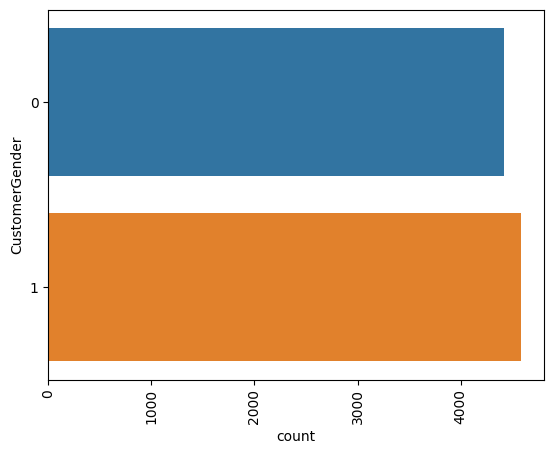

In [24]:
# plotting the CustomerGender
sns.countplot(y='CustomerGender', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [25]:
df_1['CustomerGender'].value_counts()

CustomerGender
1    4580
0    4420
Name: count, dtype: int64

* females (1) are more than males (0)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

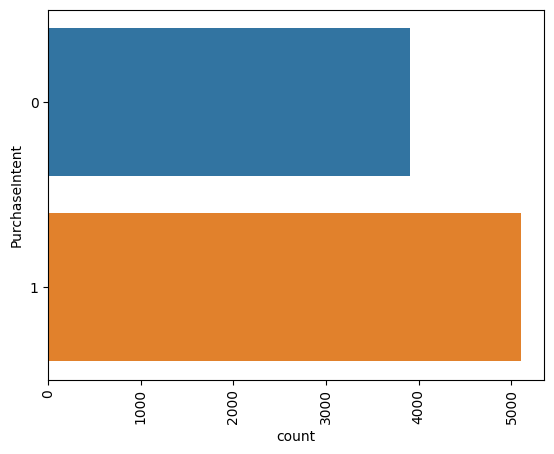

In [26]:
#ii. PurchaseIntent(Target variable)
sns.countplot(y='PurchaseIntent', data=df_1)
plt.xticks(rotation=90)

In [27]:
df_1['PurchaseIntent'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       1
4       0
       ..
8995    0
8996    1
8997    0
8998    1
8999    1
Name: PurchaseIntent, Length: 9000, dtype: int64>

* the customers that has intent is much in the dataset

In [28]:
df_1.columns

Index(['ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge',
       'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction',
       'PurchaseIntent', 'Product_cat_en', 'Brand_cat_end'],
      dtype='object')

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

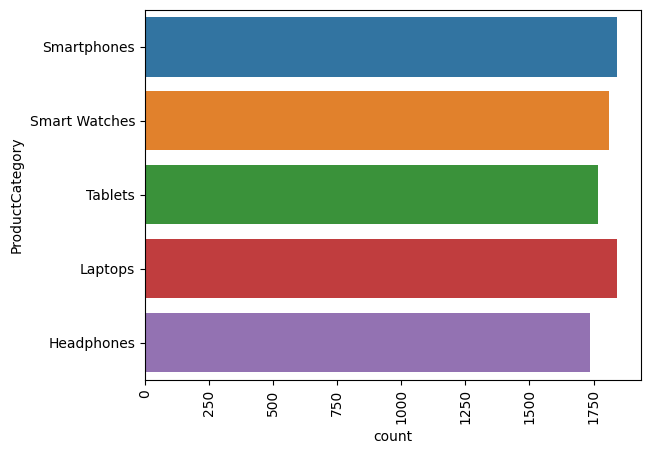

In [29]:
#  iii. ProductCategory
sns.countplot(y='ProductCategory', data=df_1)
plt.xticks(rotation=90)

In [30]:
df_1['ProductCategory'].value_counts()

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

* the different products categories has slightly the same number but Laptops users are more

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

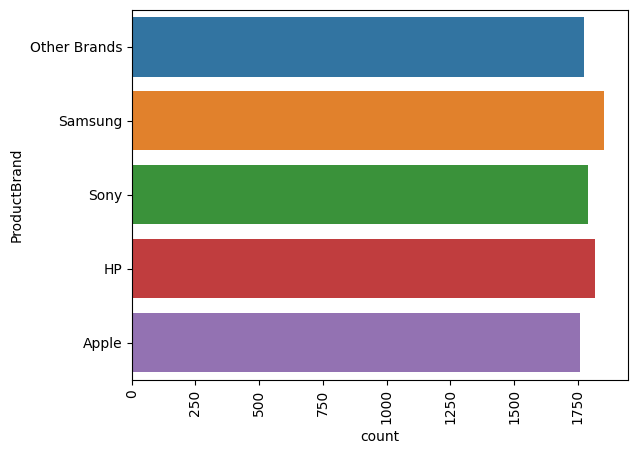

In [31]:
#  iv. ProductBrand
sns.countplot(y='ProductBrand', data=df_1)
plt.xticks(rotation=90)

In [32]:
df_1['ProductBrand'].value_counts()

ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

* The samsung brand are more in the dataset

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

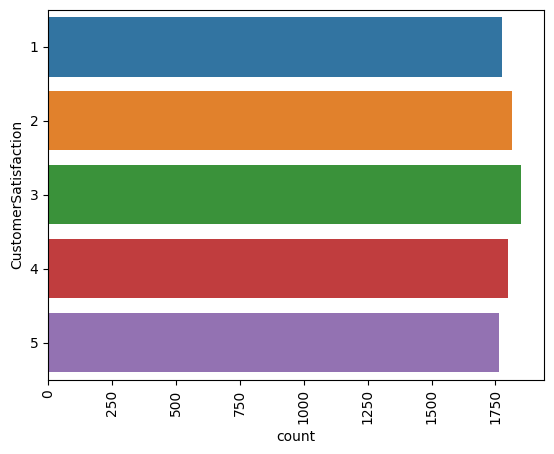

In [33]:
# v. CustomerSatisfaction
sns.countplot(y='CustomerSatisfaction', data=df_1)
plt.xticks(rotation=90)

In [34]:
df_1['CustomerSatisfaction'].value_counts()

CustomerSatisfaction
3    1848
2    1814
4    1798
1    1775
5    1765
Name: count, dtype: int64

* The custer with 2 and 1 satisfation rate are much, this is not good, it should be investimated, because its not good for the business 

In [35]:
# histogram and distribution plot for the numeric feature

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductCategory       9000 non-null   object 
 1   ProductBrand          9000 non-null   object 
 2   ProductPrice          9000 non-null   float64
 3   CustomerAge           9000 non-null   int64  
 4   CustomerGender        9000 non-null   int64  
 5   PurchaseFrequency     9000 non-null   int64  
 6   CustomerSatisfaction  9000 non-null   int64  
 7   PurchaseIntent        9000 non-null   int64  
 8   Product_cat_en        9000 non-null   int32  
 9   Brand_cat_end         9000 non-null   int32  
dtypes: float64(1), int32(2), int64(5), object(2)
memory usage: 632.9+ KB


In [37]:
# i. ProductPrice
# ii. PurchaseFrequency 
# iii. CustomerAge

<Axes: xlabel='ProductPrice', ylabel='Count'>

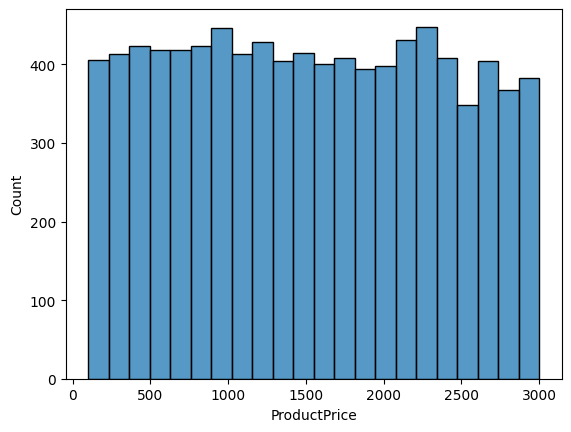

In [38]:
# i. ProductPrice

sns.histplot(df_1['ProductPrice'])

<Axes: xlabel='ProductPrice', ylabel='Density'>

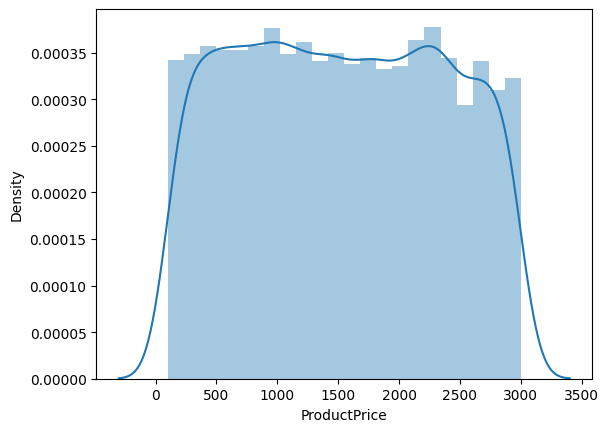

In [39]:
#plotting distplot
sns.distplot(df_1['ProductPrice'])

* the ProductPrice are well distributed

In [40]:
# ii. PurchaseFrequency 

<Axes: xlabel='PurchaseFrequency', ylabel='Count'>

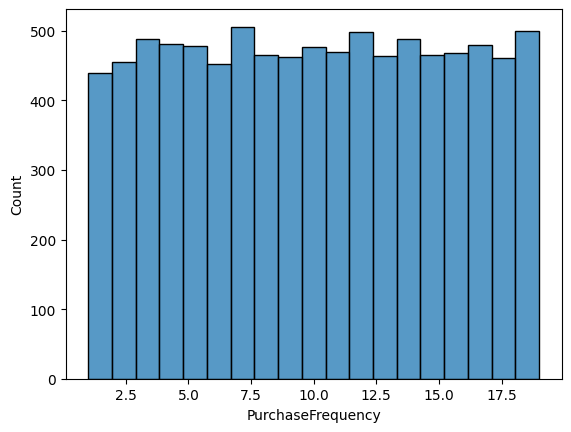

In [41]:
sns.histplot(df_1['PurchaseFrequency'])

<Axes: xlabel='PurchaseFrequency', ylabel='Density'>

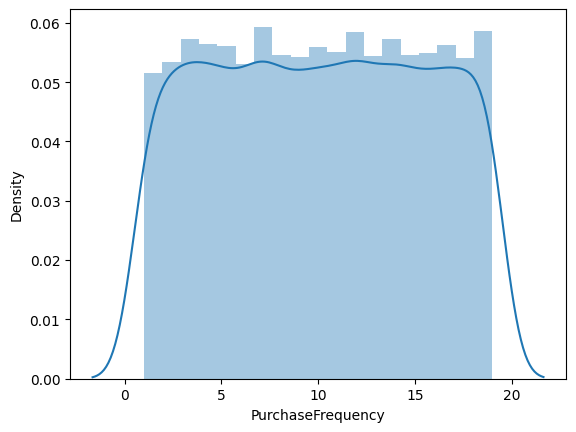

In [42]:
#plotting the distplot
sns.distplot(df_1['PurchaseFrequency'])

* The datasets are well distributed

<Axes: xlabel='CustomerAge', ylabel='Count'>

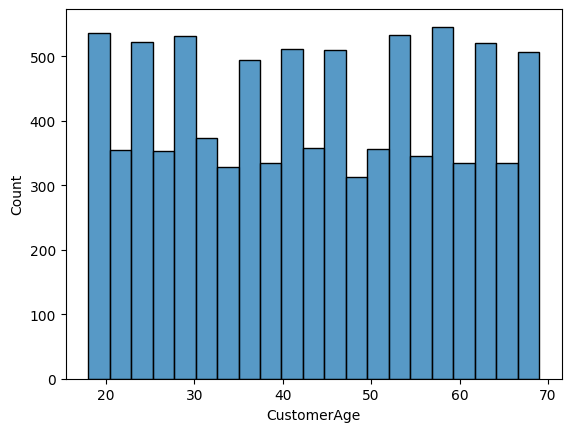

In [43]:
# iii. CustomerAge
sns.histplot(df_1['CustomerAge'])

<Axes: xlabel='CustomerAge', ylabel='Density'>

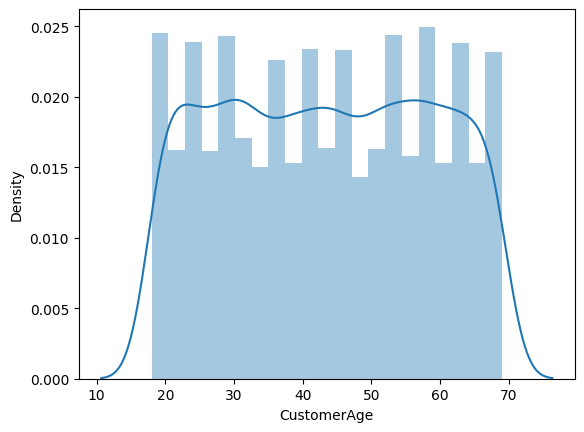

In [44]:
#plotting the distplot
sns.distplot(df_1['CustomerAge'])

<Axes: >

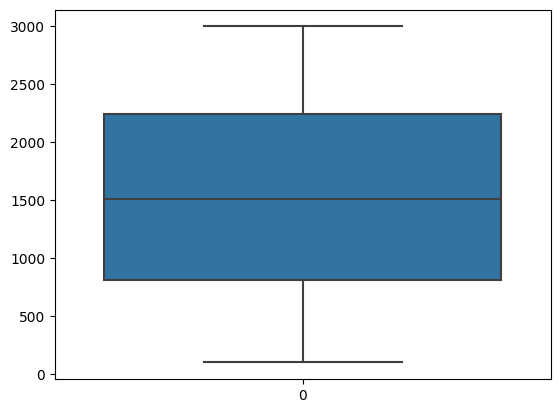

In [45]:
#checking for outliers among the numeric variables
# 1. ProductPrice
sns.boxplot(df_1['ProductPrice'])


* There is no outlier

<Axes: >

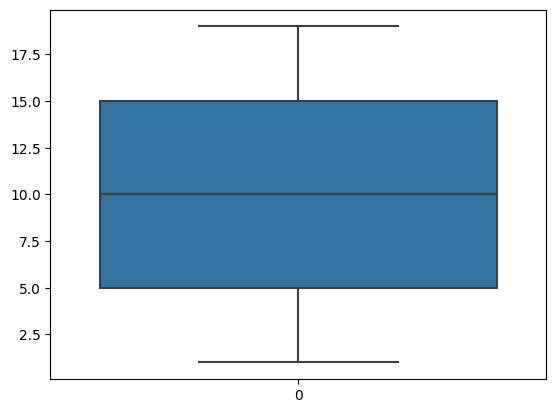

In [46]:
# 2. PurchaseFrequency
sns.boxplot(df_1['PurchaseFrequency'])

* there are no ouliers

<Axes: >

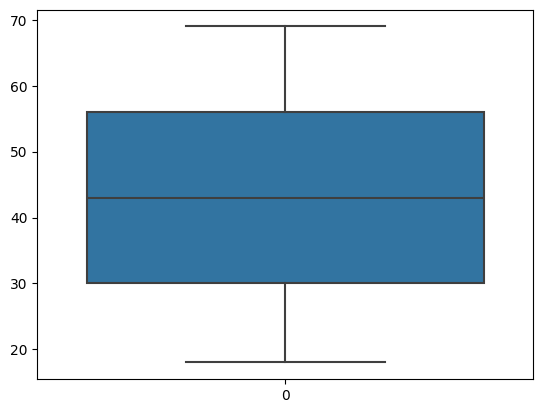

In [47]:
# 3. CustomerAge
sns.boxplot(df_1['CustomerAge'])

* There are no outliers

#### Modelling

In [48]:
# splitting the dataset 
df_2.columns

Index(['ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency',
       'CustomerSatisfaction', 'PurchaseIntent', 'Product_cat_en',
       'Brand_cat_end'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#split the X and y variable
X = df_2.drop('PurchaseIntent', axis=1)
y = df_2['PurchaseIntent']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [52]:
#import the algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#importing the boosting agorithms
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from AdaBoost import AdaBoostClassifier

#importing the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       780
           1       0.85      0.87      0.86      1020

    accuracy                           0.84      1800
   macro avg       0.84      0.83      0.83      1800
weighted avg       0.84      0.84      0.84      1800

[[618 162]
 [130 890]]


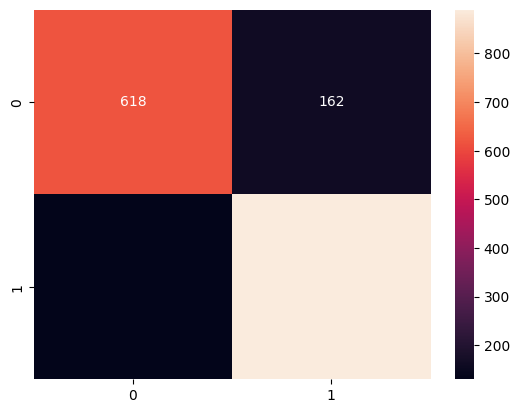

In [53]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

#prediction
y_predict_lr= lr.predict(X_test)
# evaluating with the classification report
print(classification_report(y_test, y_predict_lr))
# plotting the confusion metric
print(confusion_matrix(y_test, y_predict_lr))
sns.heatmap(confusion_matrix(y_test, y_predict_lr), annot=True, fmt='d')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'Product_cat_en'),
  Text(6, 0, 'Brand_cat_end')])

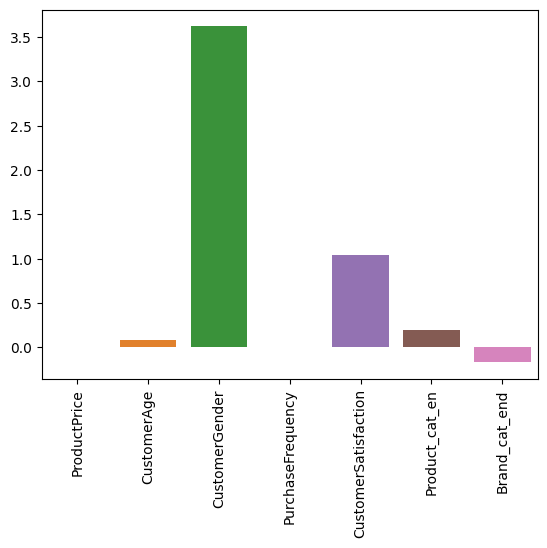

In [54]:
# making a plot of the feature importance 
sns.barplot(x=X.columns, y=lr.coef_[0])
plt.xticks(rotation=90)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       780
           1       0.90      0.91      0.91      1020

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800

[[677 103]
 [ 88 932]]


<Axes: >

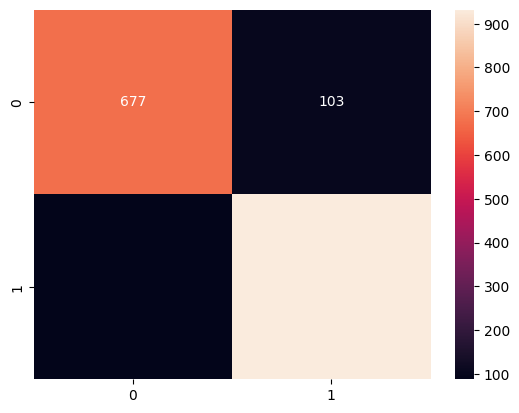

In [55]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# prediction
y_pred_dt = dt.predict(X_test)
# evaluating
print(classification_report(y_test, y_pred_dt))
#plotting the confusion matrics
print(confusion_matrix(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'Product_cat_en'),
  Text(6, 0, 'Brand_cat_end')])

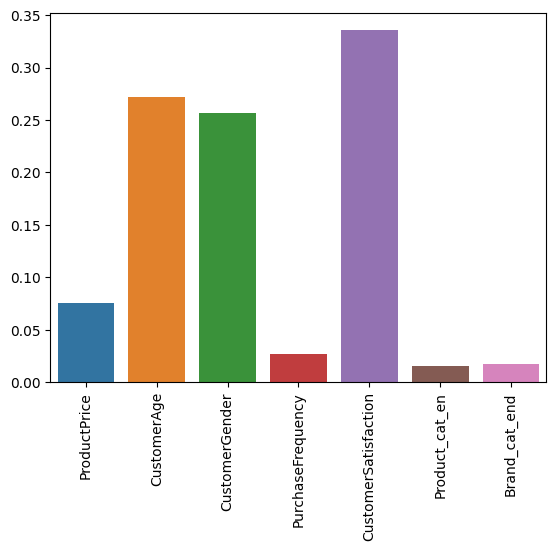

In [56]:
#plotting the feature importance of the decision tree
sns.barplot(x=X.columns, y=dt.feature_importances_)
plt.xticks(rotation=90)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.95      1800
   macro avg       0.95      0.94      0.94      1800
weighted avg       0.95      0.95      0.95      1800

[[721  59]
 [ 38 982]]


<Axes: >

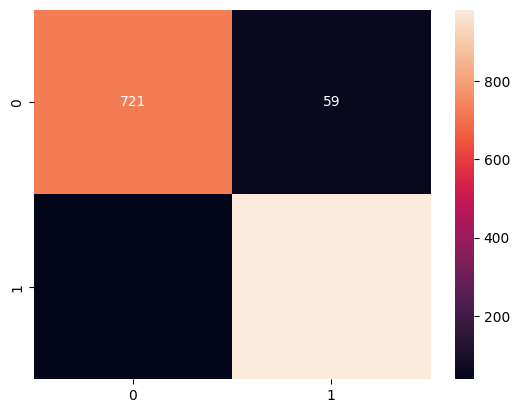

In [57]:
# RandomforestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predicting 
y_pred_rf = rf.predict(X_test)
# evaluating
print(classification_report(y_test, y_pred_rf))

# plotting the confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'Product_cat_en'),
  Text(6, 0, 'Brand_cat_end')])

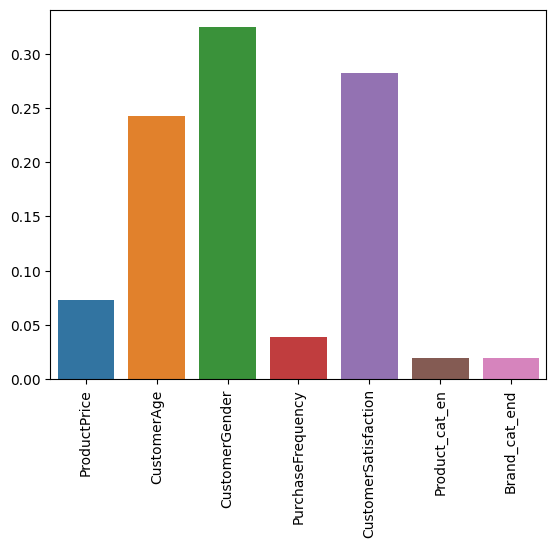

In [58]:
# plottint the feature importance
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)

              precision    recall  f1-score   support

           0       0.48      0.74      0.58       780
           1       0.66      0.39      0.49      1020

    accuracy                           0.54      1800
   macro avg       0.57      0.56      0.54      1800
weighted avg       0.58      0.54      0.53      1800

[[578 202]
 [625 395]]


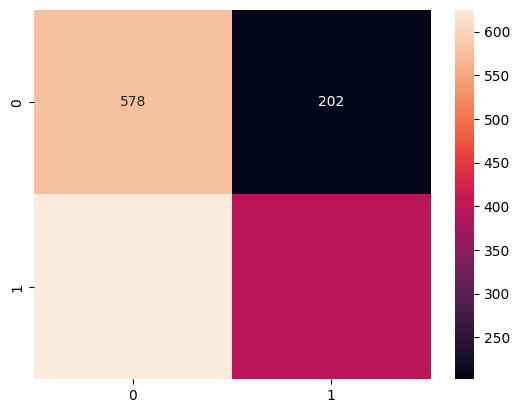

In [59]:
# Kneighbors
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# prediction
y_pred_knn = knn.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_knn))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.show()

* performed poor no need to check for feature importance

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       780
           1       0.57      1.00      0.72      1020

    accuracy                           0.57      1800
   macro avg       0.28      0.50      0.36      1800
weighted avg       0.32      0.57      0.41      1800

[[   0  780]
 [   0 1020]]


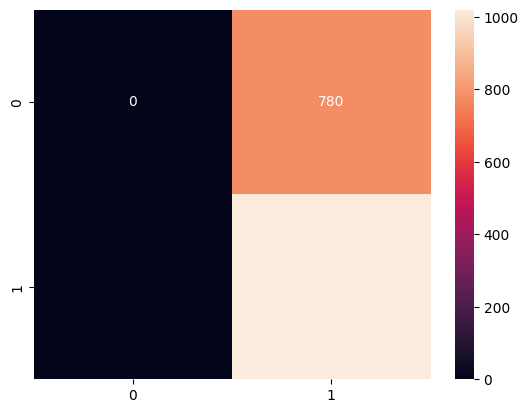

In [60]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)

# prediction
y_pred_svc = svc.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_svc))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_svc))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')
plt.show()

* SVM did not perform well, so need to check the feature importance

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       780
           1       0.85      0.92      0.88      1020

    accuracy                           0.86      1800
   macro avg       0.87      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

[[621 159]
 [ 86 934]]


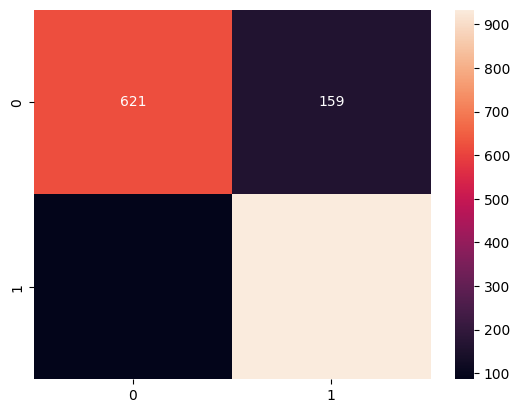

In [61]:
# gaussian
gbn = GaussianNB()
gbn.fit(X_train, y_train)

# prediction
y_pred_gbn = gbn.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_gbn))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_gbn))
sns.heatmap(confusion_matrix(y_test, y_pred_gbn), annot=True, fmt='d')
plt.show()

* Gaussian does not have feature importance

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.95      1800
   macro avg       0.95      0.94      0.94      1800
weighted avg       0.95      0.95      0.95      1800

[[721  59]
 [ 38 982]]


<Axes: >

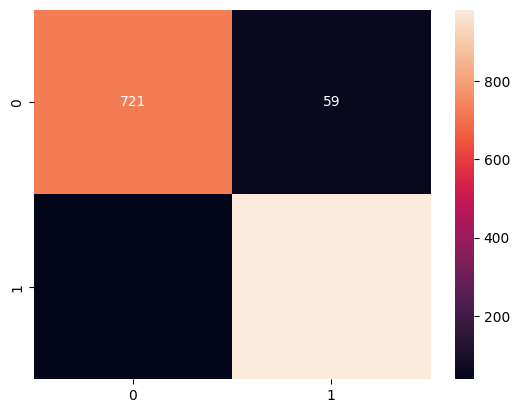

In [62]:
# catboost
cb = CatBoostClassifier(random_state=42, verbose=0)
cb.fit(X_train, y_train)

# prediction
y_pred_cb = cb.predict(X_test)
# evaluating
print(classification_report(y_test, y_pred_cb))

#plotting the confusion matrix
print(confusion_matrix(y_test, y_pred_cb))
sns.heatmap(confusion_matrix(y_test, y_pred_cb), annot=True, fmt='d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'Product_cat_en'),
  Text(6, 0, 'Brand_cat_end')])

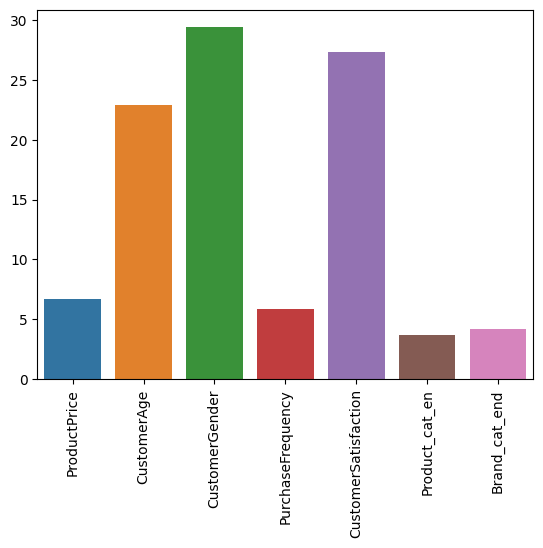

In [63]:
# feature importance
sns.barplot(x=X.columns, y=cb.feature_importances_)
plt.xticks(rotation=90)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.95      1800
   macro avg       0.95      0.94      0.94      1800
weighted avg       0.95      0.95      0.95      1800

[[721  59]
 [ 39 981]]


<Axes: >

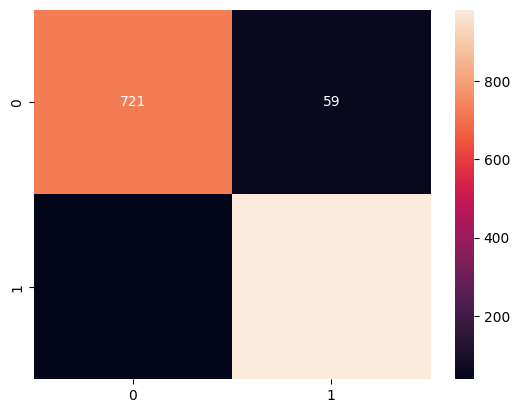

In [64]:
#xgboost 
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# prediction
y_pred_xgb = xgb.predict(X_test)
# Evaluation
print(classification_report(y_test, y_pred_xgb))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'Product_cat_en'),
  Text(6, 0, 'Brand_cat_end')])

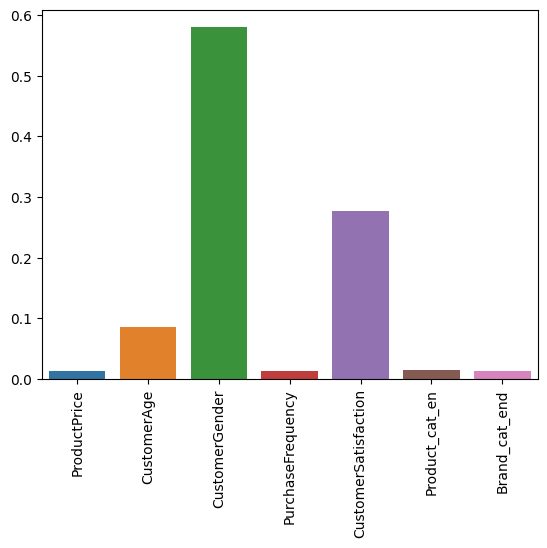

In [65]:
# plotting the feature importance 
sns.barplot(x=X.columns, y=xgb.feature_importances_)
plt.xticks(rotation=90)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.95      1800
   macro avg       0.95      0.94      0.94      1800
weighted avg       0.95      0.95      0.95      1800

[[721  59]
 [ 38 982]]


<Axes: >

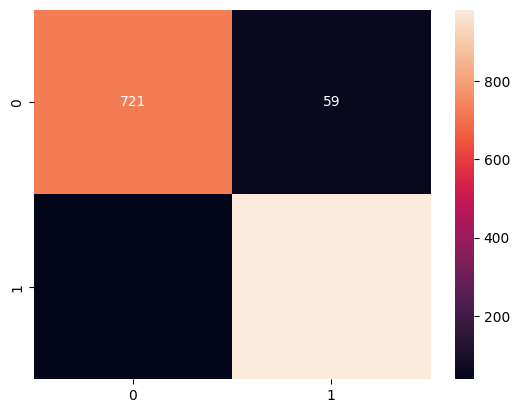

In [66]:
#lightgbm
lgbm = LGBMClassifier(random_state=42, verbose=0)
lgbm.fit(X_train, y_train)

# prediction
y_pred_lgbm = lgbm.predict(X_test)
# Evaluating
print(classification_report(y_test, y_pred_lgbm))

#plotting the confision matix heatmap
print(confusion_matrix(y_test, y_pred_lgbm))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d')


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'Product_cat_en'),
  Text(6, 0, 'Brand_cat_end')])

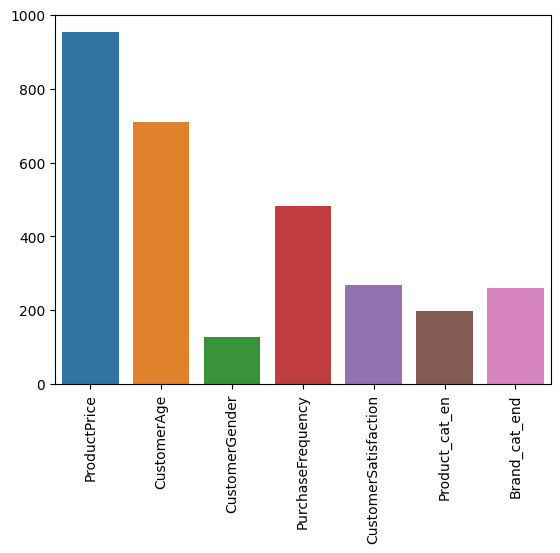

In [67]:
#plotting the feature importance 
sns.barplot(x=X.columns, y=lgbm.feature_importances_)
plt.xticks(rotation=90)

### Assignment

Perform Multivariate Analysis on the tope performing features.

* Customer age
* Customer Satisfaction
* Customer Gender
* Product Price
* Purchase Frequency

##### 1 Customer Age --- numeric feature

In [68]:
# Cross-tabulation
cross_tab = pd.crosstab(df_2['CustomerAge'], df_2['PurchaseIntent'])
cross_tab

PurchaseIntent,0,1
CustomerAge,,
18,116,60
19,128,46
20,156,31
21,150,47
22,126,32
23,150,45
24,143,38
25,119,28
26,128,53


* we can say as the age increase so the positive purchase intent increase

In [69]:
df_2[['CustomerAge','PurchaseIntent']].describe()

,CustomerAge,PurchaseIntent
count,9000.000000,9000.000000
mean,43.347000,0.566444
std,15.055084,0.495593
min,18.000000,0.000000
25%,30.000000,0.000000
50%,43.000000,1.000000
75%,56.000000,1.000000
max,69.000000,1.000000


<Axes: xlabel='CustomerAge', ylabel='Density'>

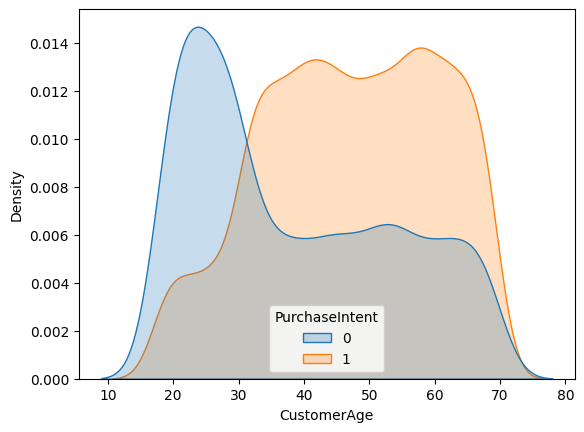

In [70]:
#plotting KDE plot to understand distribution
sns.kdeplot(data=df_2, x='CustomerAge', hue='PurchaseIntent', fill=True)

* As the Age increase, the density for PurchaseIntent -1 increase also, but that of PurchaseIntent -2 isn't the same way 

<Axes: >

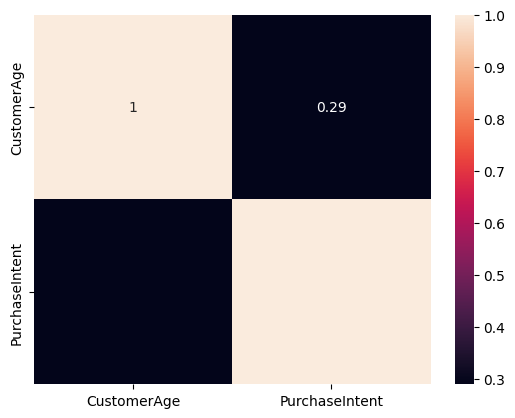

In [71]:
ca_pi = df_2[['CustomerAge','PurchaseIntent']]
sns.heatmap(ca_pi.corr(), annot=True)

* we can say that the CustomerAge has a weak positive correlation of 0.29 with the PurchaseIntent

([<matplotlib.axis.XTick at 0x20284859c90>,
 [Text(1, 0, 'PurchaseIntent = 0'), Text(2, 0, 'PurchaseIntent = 1')])

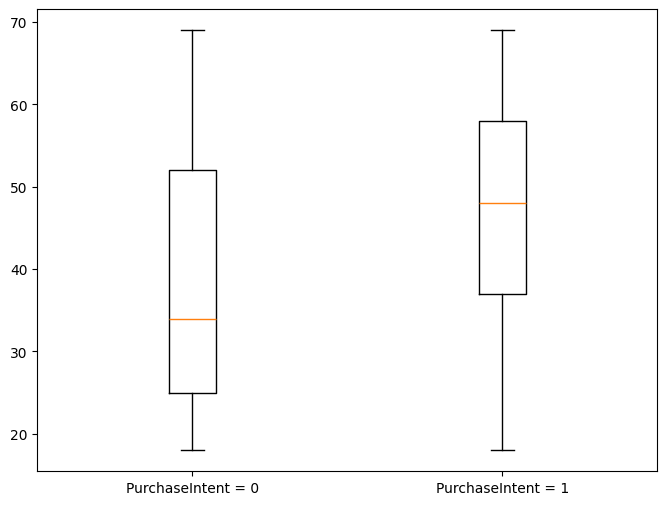

In [74]:
# plotting boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([ca_pi['CustomerAge'][ca_pi['PurchaseIntent'] == 0], ca_pi['CustomerAge'][ca_pi['PurchaseIntent'] == 1]])
plt.xticks([1, 2], ['PurchaseIntent = 0', 'PurchaseIntent = 1'])


* Customers of more advance age has positive intention for purchasing a phone than those of lower age

##### 2 Customer Satisfaction ---- categorical feature

In [75]:
# performing groupby
df_2.groupby('PurchaseIntent').agg('count')['CustomerSatisfaction']

PurchaseIntent
0    3902
1    5098
Name: CustomerSatisfaction, dtype: int64

In [76]:
df_2[['CustomerSatisfaction', 'PurchaseIntent']]

,CustomerSatisfaction,PurchaseIntent
0,1,0
1,2,1
2,5,1
3,3,1
4,3,0
...,...,...
8995,4,0
8996,1,1
8997,4,0
8998,2,1


In [77]:
cust_sat_vs_pi = df[['CustomerSatisfaction','PurchaseIntent']]
cust_sat_vs_pi.corr()

,CustomerSatisfaction,PurchaseIntent
CustomerSatisfaction,1.000000,0.391133
PurchaseIntent,0.391133,1.000000


In [78]:
# Cross-tabulation
cross_tabb = pd.crosstab(cust_sat_vs_pi['CustomerSatisfaction'], cust_sat_vs_pi['PurchaseIntent'])
cross_tabb

PurchaseIntent,0,1
CustomerSatisfaction,,
1,1091,684
2,1108,706
3,1152,696
4,279,1519
5,272,1493


* the higher the customer Satisfation rate, the higher the positive purchase intention increase and vice versa

<Axes: >

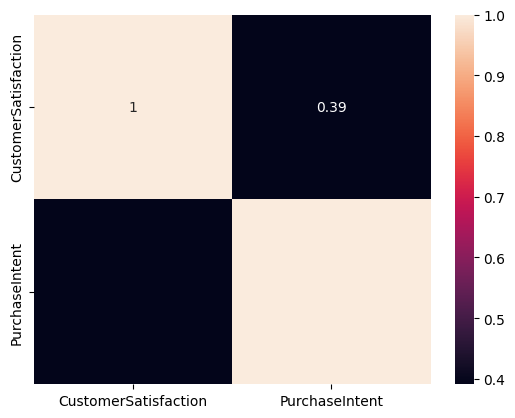

In [79]:
#correlation matrix
sns.heatmap(cust_sat_vs_pi.corr(), annot=True)

* we can then conclude that the CustomerSatisfaction is moderate postive correlated to PurchaseIntent with correlaton coefficient of 0.39, so the higher the satisfaction rate, the higher the likeliness of purchasing

<Axes: xlabel='PurchaseIntent', ylabel='count'>

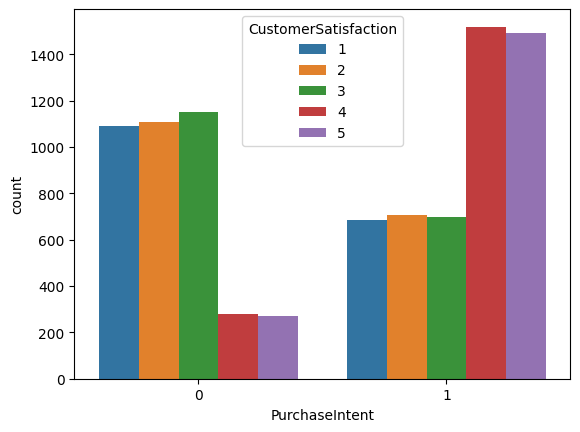

In [80]:
sns.countplot(x='PurchaseIntent', data=cust_sat_vs_pi, hue='CustomerSatisfaction')

##### 3 Customer Gender --- categorical feature

In [81]:
# groupby
df_2.groupby(['PurchaseIntent', 'CustomerGender'])['PurchaseIntent'].count()

PurchaseIntent  CustomerGender
0               0                 3041
                1                  861
1               0                 1379
                1                 3719
Name: PurchaseIntent, dtype: int64

In [82]:

# Cross-tabulation
cross_tabb_ = pd.crosstab(df_2['CustomerGender'], df_2['PurchaseIntent'])
cross_tabb_

PurchaseIntent,0,1
CustomerGender,,
0,3041,1379
1,861,3719


<Axes: xlabel='PurchaseIntent', ylabel='count'>

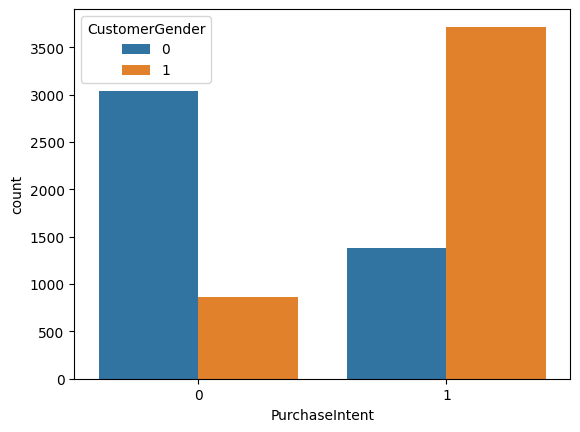

In [83]:
sns.countplot(x='PurchaseIntent', data=df_2, hue='CustomerGender')

<Axes: >

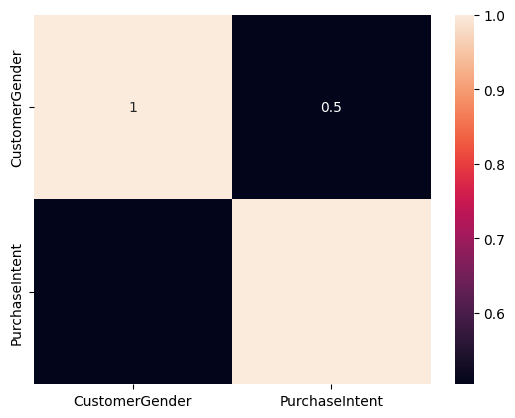

In [84]:
sns.heatmap(df_2[['CustomerGender','PurchaseIntent']].corr(), annot=True)

* we can see from the above that the more the female gender, the more likely for purchase and the more the male gender, the more the negative purchse intent, the customerGender is positive moderate correlation with the purchase intent with 0.5 correlation coefficient value.
i.e females are more likely to purchase
we can still analyse further and ask WHY

##### 4 Product Price --- numeric feaure

<Axes: xlabel='ProductPrice', ylabel='Density'>

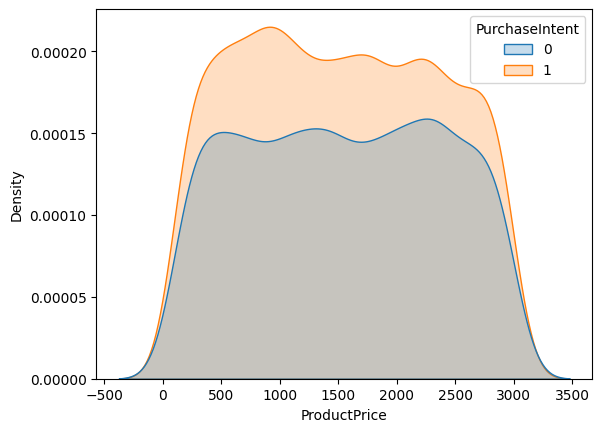

In [85]:
#plotting KDE plot to understand distribution
sns.kdeplot(data=df_2, x='ProductPrice', hue='PurchaseIntent', fill=True)

([<matplotlib.axis.XTick at 0x20284b31650>,
 [Text(1, 0, 'PurchaseIntent = 0'), Text(2, 0, 'PurchaseIntent = 1')])

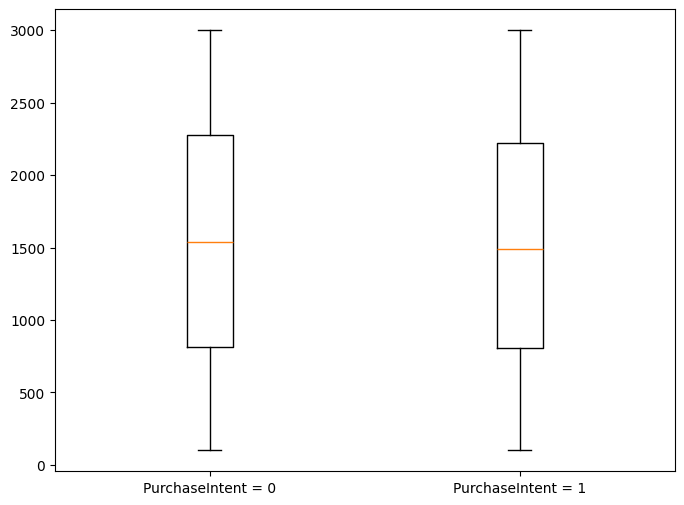

In [87]:
# plotting boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_2['ProductPrice'][df_2['PurchaseIntent'] == 0], df_2['ProductPrice'][df_2['PurchaseIntent'] == 1]])
plt.xticks([1, 2], ['PurchaseIntent = 0', 'PurchaseIntent = 1'])


* it looks like the relationship is not that clear, it looks like the mean for both the 0 and 1 class is almost the same, lets do further investigation

In [88]:
df_2[['ProductPrice','PurchaseIntent']].describe()

,ProductPrice,PurchaseIntent
count,9000.000000,9000.000000
mean,1527.429195,0.566444
std,829.900898,0.495593
min,100.376358,0.000000
25%,809.165014,0.000000
50%,1513.024577,1.000000
75%,2244.415520,1.000000
max,2999.852253,1.000000


In [91]:
df_2.groupby('PurchaseIntent')['ProductPrice'].mean()

PurchaseIntent
0    1544.039998
1    1514.715316
Name: ProductPrice, dtype: float64

<Axes: >

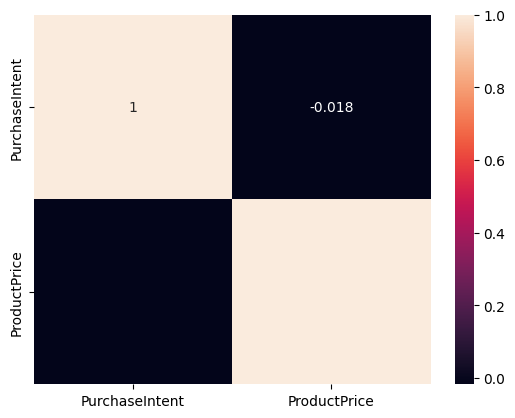

In [94]:
# correlaton heatmap
sns.heatmap(df_2[['PurchaseIntent','ProductPrice']].corr(), annot=True)


* from the above we can see that there aren't any relationship between the two feature
* we can say they are the same and no significant different between the two categories of the PurchaseIntent, non affect the other

In [97]:
# performing a T-test to verify the above
# hypothesis Testing assumption --- the mean of the two features are not equal if p-value is < 0.05 
# i.e the mean has significant difference, 
# but if p-value > 0.05 mean is not significantly different between the both PurchaseIntent category.
# Mean Comparison
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(df_2['ProductPrice'][df_2['PurchaseIntent'] == 0],
                          df_2['ProductPrice'][df_2['PurchaseIntent'] == 1])
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: 1.6613909886569673
p-value: 0.0966697834891562


* from the above, our assumption is correct the mean ProductPrice for both category of the PurchaseIntent are both almost desame, no significant difference.
* we can say that the ProductPrice doesnt really tell of the PurchaseIntent of the Customer

##### 5 Purchase Frequency

<Axes: xlabel='PurchaseFrequency', ylabel='Count'>

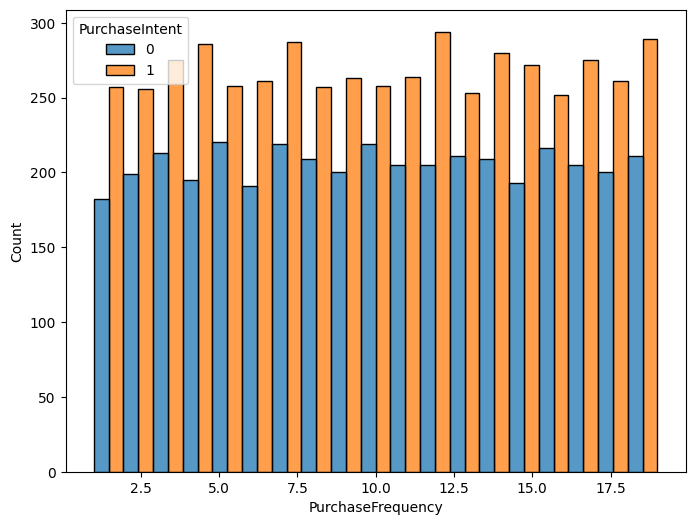

In [98]:
# Grouped Histogram
plt.figure(figsize=(8, 6))
sns.histplot(x='PurchaseFrequency', hue='PurchaseIntent', data=df_2, multiple='dodge')

* The distribution is quite similar

<Axes: xlabel='PurchaseIntent', ylabel='PurchaseFrequency'>

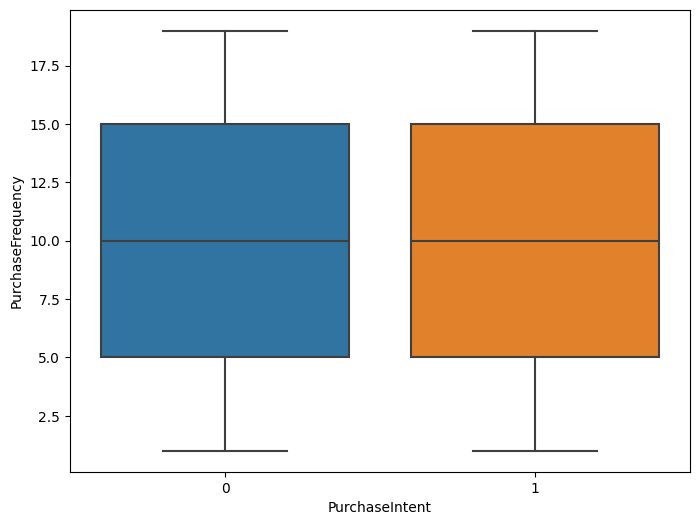

In [101]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='PurchaseIntent', y='PurchaseFrequency', data=df_2)

* from the above also we can see that the mean value are kind of similar for both PurchaseIntent category to the PurchaseFrequency

In [102]:
#groupby
df_2.groupby('PurchaseIntent')['PurchaseFrequency'].mean()

PurchaseIntent
0    10.063813
1    10.047666
Name: PurchaseFrequency, dtype: float64

<Axes: >

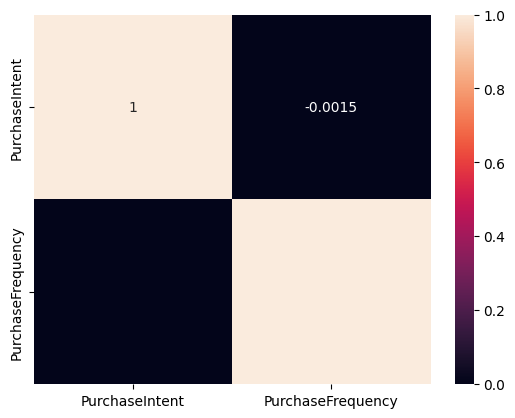

In [105]:
# checking the correlation coefficient
sns.heatmap(df_2[['PurchaseIntent','PurchaseFrequency']].corr(), annot=True)

* There is correlation between the two features

In [107]:
# lets finalize our analysis and assumption
# Performing T-test
t_stat, p_val = ttest_ind(df_2['PurchaseFrequency'][df_2['PurchaseIntent'] == 0],
                          df_2['PurchaseFrequency'][df_2['PurchaseIntent'] == 1])
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 0.13899860525410065
p-value: 0.8894543618643913


* from the above, our assumption is correct the mean Purchase Frequency for both category of the PurchaseIntent are both almost desame, no significant difference.
* we can say that the PurchaseFrequency doesnt really tell of the PurchaseIntent of the Customer

##### Final Conclusion from the analysis

1. Customers of more advance age has positive intention for purchasing a phone than those of lower age
2. We can conclude that the CustomerSatisfaction is moderate postive correlated to PurchaseIntent with correlaton coefficient of 0.39, so the higher the satisfaction rate, the higher the likeliness of purchasing.
3. We saw that the female gender are most likely to purchase than the male gender.
4. From the analysis We can say that the ProductPrice doesnt really tell of the PurchaseIntent of the Customer
5. From the Analysis, We can also say that the PurchaseFrequency doesnt really tell of the PurchaseIntent of the Customer

Therefore we can say that the features that greatly affects the PurchaseIntent are:
* Customer Age
* Customer Satisfaction
* Customer Gender

While other has Product Price and the PurchaseFrequency little or not effect on the P

#### Feature Engineering 

In [112]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductPrice,9000.0,1527.429195,829.900898,100.376358,809.165014,1513.024577,2244.41552,2999.852253
CustomerAge,9000.0,43.347000,15.055084,18.000000,30.000000,43.000000,56.00000,69.000000
CustomerGender,9000.0,0.508889,0.499949,0.000000,0.000000,1.000000,1.00000,1.000000
PurchaseFrequency,9000.0,10.054667,5.461328,1.000000,5.000000,10.000000,15.00000,19.000000
CustomerSatisfaction,9000.0,2.996000,1.405301,1.000000,2.000000,3.000000,4.00000,5.000000
PurchaseIntent,9000.0,0.566444,0.495593,0.000000,0.000000,1.000000,1.00000,1.000000
Product_cat_en,9000.0,2.006778,1.402876,0.000000,1.000000,2.000000,3.00000,4.000000
Brand_cat_end,9000.0,2.010444,1.409295,0.000000,1.000000,2.000000,3.00000,4.000000


In [113]:
# creating a fucntion to classify Product price, Customer Age and Purchase frequency

def cat_product_price(x):
  if x <= 1000:
    return 0 # 'low'
  elif 1000 < x < 2000:
    return 1 # 'medium'
  else:
    return 2 # 'high'

def cat_customer_age(x):
  if x <= 30:
    return 0 # 'young'
  elif 30 < x < 45:
    return 1 # 'middle age'
  else:
    return 2 # 'adult'


def cat_purchase_freq(x):
  if x <= 6:
    return 0 # 'low'
  elif 6 < x < 12:
    return 1 # 'medium'
  else:
    return 2 # 'high'

# implementing feat engineering
df_2['ProductPrice_cat'] = df_2['ProductPrice'].apply(cat_product_price)
df_2['CustomerAge_cat'] = df_2['CustomerAge'].apply(cat_customer_age)
df_2['PurchaseFrequency_cat'] = df_2['PurchaseFrequency'].apply(cat_purchase_freq)

# dividing Product price, customer age, purchase frequency
df_2['productprice_div_customerage'] = df_2['ProductPrice'] / df_2['CustomerAge']
df_2['productprice_div_purchasefreq'] = df_2['ProductPrice'] / df_2['PurchaseFrequency']
df_2['customerage_div_purchasefreq'] = df_2['CustomerAge'] / df_2['PurchaseFrequency']

# dropping the original columns
df_3 = df_2.drop(columns=['ProductPrice', 'CustomerAge', 'PurchaseFrequency'])

In [114]:
df_3.head()

,CustomerGender,CustomerSatisfaction,PurchaseIntent,Product_cat_en,Brand_cat_end,ProductPrice_cat,CustomerAge_cat,PurchaseFrequency_cat,productprice_div_customerage,productprice_div_purchasefreq,customerage_div_purchasefreq
0,0,1,0,3,2,0,0,0,17.386093,156.474834,9.000000
1,1,2,1,2,3,0,1,1,28.011126,140.055629,5.000000
2,0,5,1,4,3,2,2,0,41.376481,2606.718293,63.000000
3,1,3,1,3,3,0,2,1,13.815801,87.039545,6.300000
4,0,3,0,4,4,1,2,2,31.560629,105.820934,3.352941


In [115]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [116]:
scale_feats = ['productprice_div_customerage', 'productprice_div_purchasefreq', 'customerage_div_purchasefreq']

scaler = StandardScaler()
df_3[scale_feats] = scaler.fit_transform(df_3[scale_feats])

In [117]:
df_3.head()

,CustomerGender,CustomerSatisfaction,PurchaseIntent,Product_cat_en,Brand_cat_end,ProductPrice_cat,CustomerAge_cat,PurchaseFrequency_cat,productprice_div_customerage,productprice_div_purchasefreq,customerage_div_purchasefreq
0,0,1,0,3,2,0,0,0,-0.793968,-0.300605,0.099075
1,1,2,1,2,3,0,1,1,-0.433817,-0.340587,-0.283474
2,0,5,1,4,3,2,2,0,0.019221,5.666065,5.263482
3,1,3,1,3,3,0,2,1,-0.914989,-0.469689,-0.159145
4,0,3,0,4,4,1,2,2,-0.313502,-0.423954,-0.440994


In [118]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerGender,9000.0,5.088889e-01,0.499949,0.000000,0.000000,1.000000,1.000000,1.000000
CustomerSatisfaction,9000.0,2.996000e+00,1.405301,1.000000,2.000000,3.000000,4.000000,5.000000
PurchaseIntent,9000.0,5.664444e-01,0.495593,0.000000,0.000000,1.000000,1.000000,1.000000
Product_cat_en,9000.0,2.006778e+00,1.402876,0.000000,1.000000,2.000000,3.000000,4.000000
Brand_cat_end,9000.0,2.010444e+00,1.409295,0.000000,1.000000,2.000000,3.000000,4.000000
ProductPrice_cat,9000.0,1.015222e+00,0.808536,0.000000,0.000000,1.000000,2.000000,2.000000
CustomerAge_cat,9000.0,1.222444e+00,0.826999,0.000000,0.000000,1.000000,2.000000,2.000000
PurchaseFrequency_cat,9000.0,1.114778e+00,0.849912,0.000000,0.000000,1.000000,2.000000,2.000000
productprice_div_customerage,9000.0,2.005309e-16,1.000056,-1.333985,-0.756192,-0.203399,0.455955,4.166720
productprice_div_purchasefreq,9000.0,8.092292e-17,1.000056,-0.668032,-0.484357,-0.315811,0.010610,6.602243


array([[<Axes: title={'center': 'productprice_div_customerage'}>,
        <Axes: title={'center': 'productprice_div_purchasefreq'}>],
       [<Axes: title={'center': 'customerage_div_purchasefreq'}>,
        <Axes: >]], dtype=object)

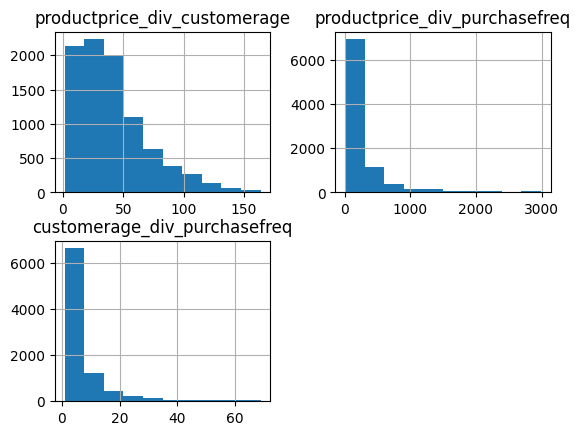

In [119]:
df_2[scale_feats].hist()

array([[<Axes: title={'center': 'productprice_div_customerage'}>,
        <Axes: title={'center': 'productprice_div_purchasefreq'}>],
       [<Axes: title={'center': 'customerage_div_purchasefreq'}>,
        <Axes: >]], dtype=object)

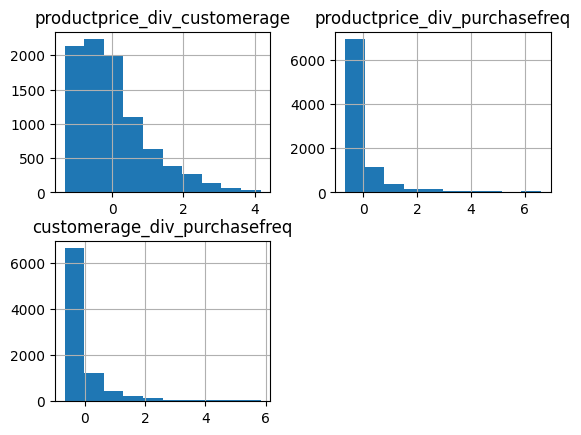

In [120]:
df_3[scale_feats].hist()

In [121]:
# splitting our data

X = df_3.drop('PurchaseIntent', axis=1)
y = df_3['PurchaseIntent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Now, we are gonna use of feature engineer dataset on the Algorithms with atleast 80% average f1-score value
*logistic Regression, decision tree, randomforest, GaussianNB, xgboost, catboost, Lightboost

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       780
           1       0.89      0.88      0.88      1020

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800

[[665 115]
 [122 898]]


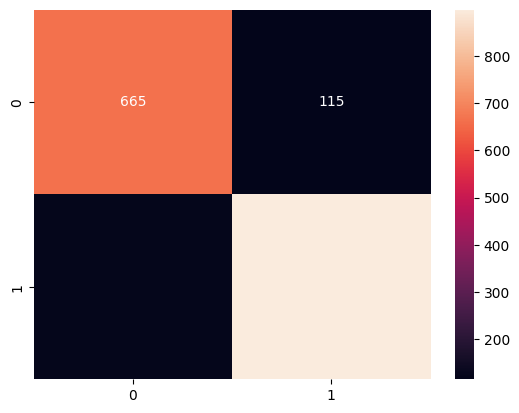

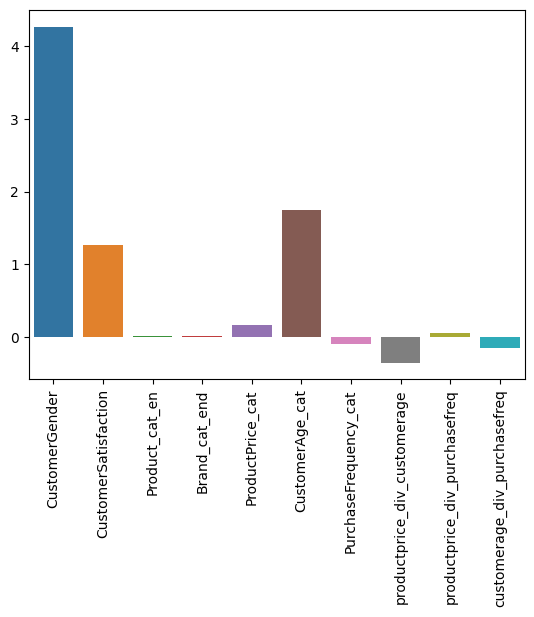

In [123]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# prediction
y_pred_lr = lr.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_lr))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.show()
# making a plot for the feature importance
sns.barplot(x=X.columns, y=lr.coef_[0])
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       780
           1       0.91      0.89      0.90      1020

    accuracy                           0.89      1800
   macro avg       0.88      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800

[[686  94]
 [109 911]]


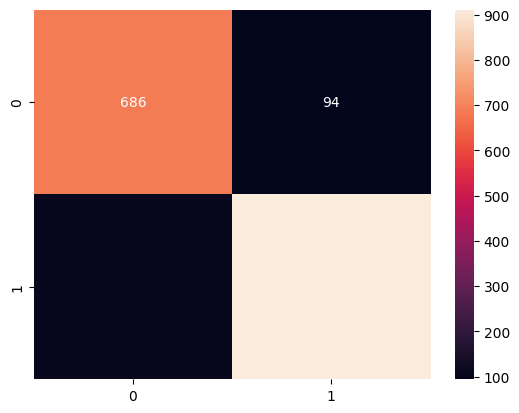

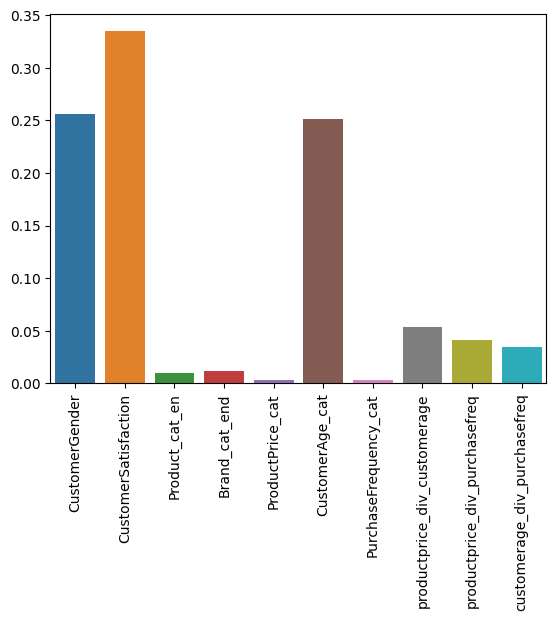

In [124]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# prediction
y_pred_dt = dt.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_dt))
# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.show()

# plot of feature importance
sns.barplot(x=X.columns, y=dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[715  65]
 [ 44 976]]


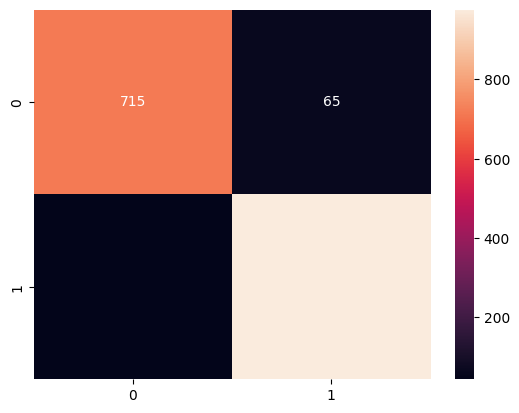

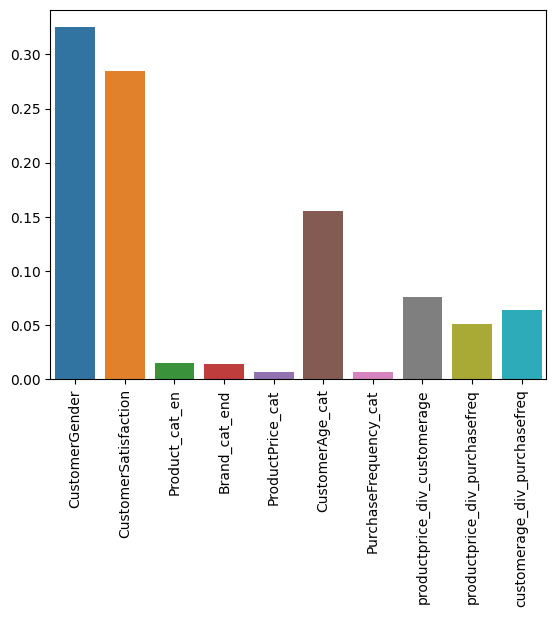

In [125]:
# random forest classifer
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# prediction
y_pred_rf = rf.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_rf))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.show()

# feature importance plot
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       780
           1       0.90      0.89      0.89      1020

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800

[[677 103]
 [113 907]]


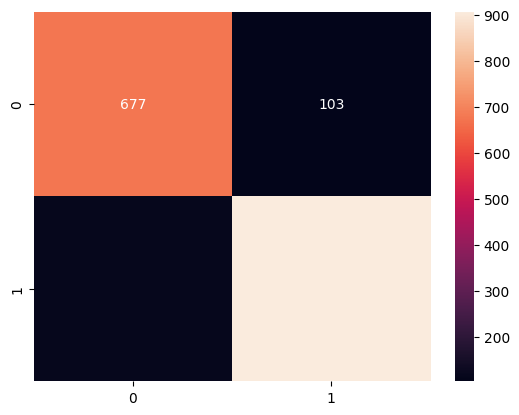

In [127]:
# gaussian
gbn = GaussianNB()
gbn.fit(X_train, y_train)

# prediction
y_pred_gbn = gbn.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_gbn))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_gbn))
sns.heatmap(confusion_matrix(y_test, y_pred_gbn), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[714  66]
 [ 45 975]]


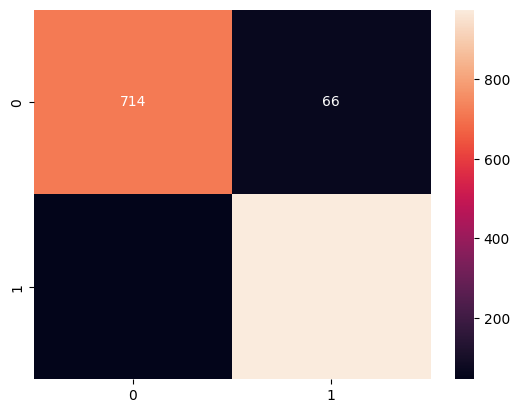

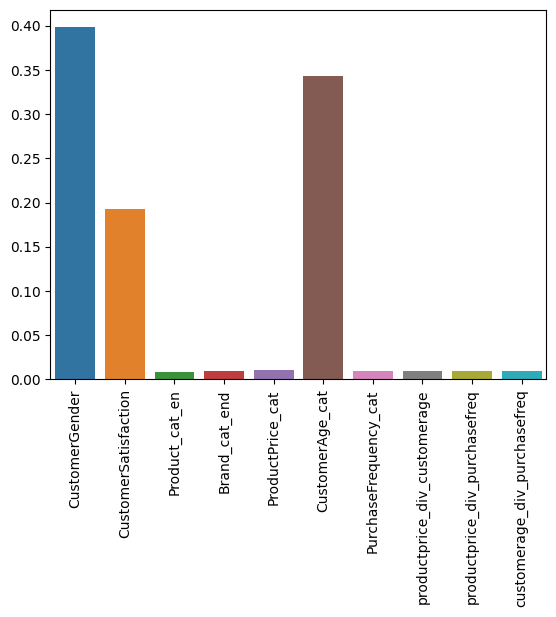

In [128]:
# Xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# prediction
y_pred_xgb = xgb.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_xgb))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.show()

# feature importance plot
sns.barplot(x=X.columns, y=xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[715  65]
 [ 43 977]]


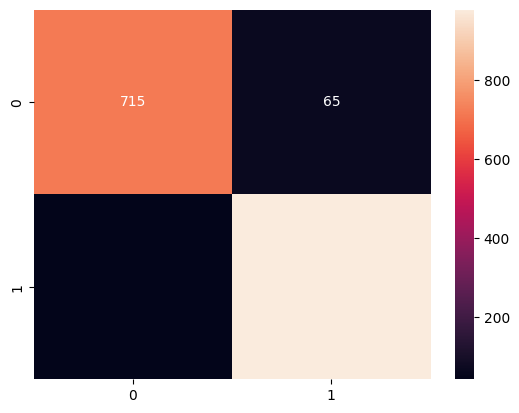

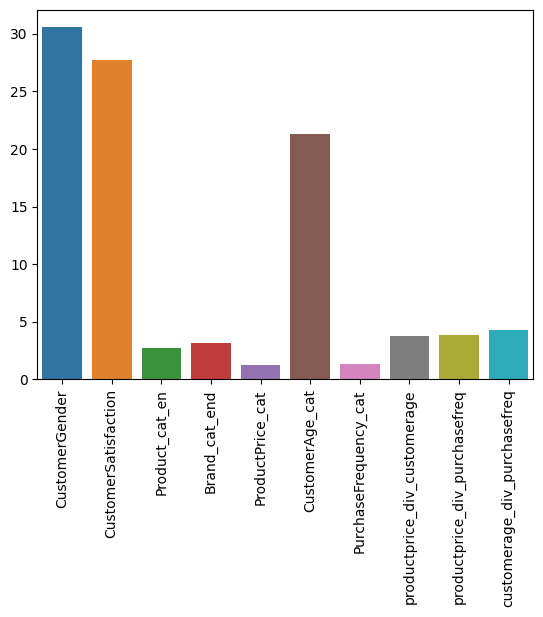

In [129]:
# catboost

cb = CatBoostClassifier(random_state=42, verbose=0)
cb.fit(X_train, y_train)

# prediction
y_pred_cb = cb.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_cb))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_cb))
sns.heatmap(confusion_matrix(y_test, y_pred_cb), annot=True, fmt='d')
plt.show()

# feature importance plot
sns.barplot(x=X.columns, y=cb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[715  65]
 [ 43 977]]


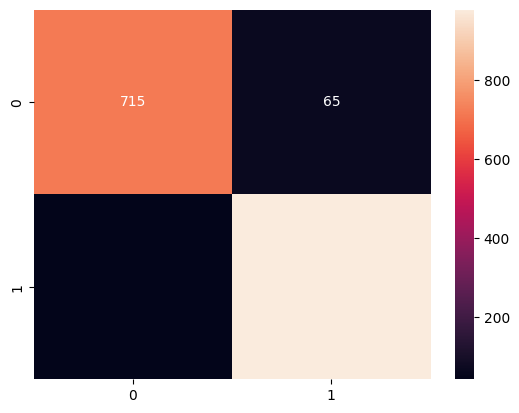

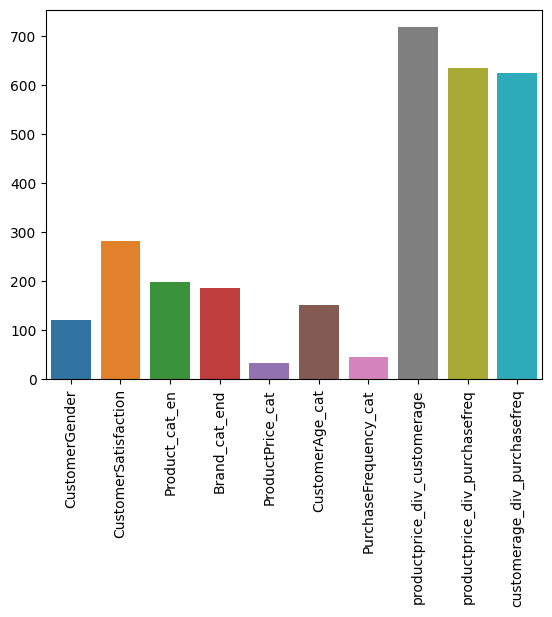

In [130]:
# LightGBM
lgbm = LGBMClassifier(random_state=42, verbose=0)
lgbm.fit(X_train, y_train)

# prediction
y_pred_lgbm = lgbm.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_lgbm))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_lgbm))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d')
plt.show()

# feature importance plot
sns.barplot(x=X.columns, y=lgbm.feature_importances_)
plt.xticks(rotation=90)
plt.show()

#####  from the above we can see that the following models performed best with 0.94 average f1-score:
* lightGBM, catboost, Xgboost, random forest

we can also check the one that has the least Type 1 and Type 2 error

                    lightGBM     catboost    Xgboost     random forest
          Type 1:      65           65          66            65
          Type 2:      43           43          45            44
           Total:     108          108         111            109